# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# Plot figures
%matplotlib inline
import matplotlib        as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)




# save figures
ROOT_DIR = "."
DIR      = "decision_tree"
FIG_PATH = os.path.join(ROOT_DIR, "images", DIR)

os.makedirs(FIG_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(os.path.join(FIG_PATH, fig_id + "." + fig_extension),\
                bbox_inches='tight',\
                pad_inches=0.09,\
                format=fig_extension,\
                dpi=resolution)

**Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are powerful algorithms, capable of fitting complex datasets. For example, you can train a DecisionTreeRegressor model on the California housing dataset, fitting it perfectly (actually, overfitting it).**

**Decision Trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms available today.**

# Training and Visualizing a Decision Tree

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree     import DecisionTreeClassifier

# Load data
iris = load_iris()
X    = iris.data[:, 2:] # 2 columns: petal length and width, equivalent to iris.data[:, 2:3]
y    = iris.target

print( 'Shape of X:', X.shape )
print( 'Shape of y:', y.shape )

print( 'y:' )
print( y )

print()
print( 'target_names:' )
print( iris.target_names )

print()
print( 'Keys:' )
for key in iris:
  print( key )

print( '---' )
# Decision Tree model
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Training the model
tree_clf.fit(X, y)

Shape of X: (150, 2)
Shape of y: (150,)
y:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

target_names:
['setosa' 'versicolor' 'virginica']

Keys:
data
target
target_names
DESCR
feature_names
filename
---


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

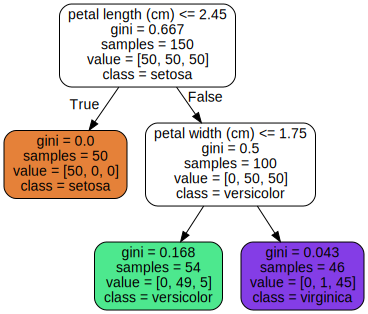

In [3]:
from graphviz     import Source
from sklearn.tree import export_graphviz

# visualize the trained Decision Tree by using the export_graphviz() method
# to output a graph definition file called iris_tree.dot:
export_graphviz(
                tree_clf,
                out_file=os.path.join(FIG_PATH, "iris_tree.dot"),
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
                )

Source.from_file(os.path.join(FIG_PATH, "iris_tree.dot"))

Saving figure decision_tree_decision_boundaries_plot


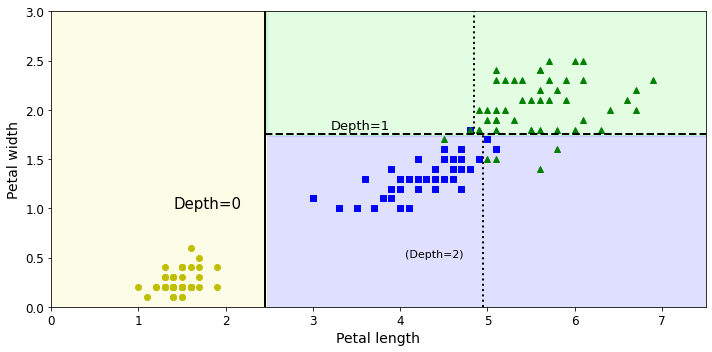

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, x_axis=[0, 7.5], y_axis=[0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(x_axis[0], x_axis[1], 100)
    x2s = np.linspace(y_axis[0], y_axis[1], 100)
    
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new  = np.c_[x1.ravel(), x2.ravel()]
    
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.xlim(x_axis)
        plt.ylim(y_axis)
    
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
    if legend:
        plt.legend(loc="lower right", fontsize=14)
# End - def

# Plot figure
plt.figure(figsize=(10, 5))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Predicting classes and class probabilities

In [5]:
# 3 target names: ['setosa' 'versicolor' 'virginica']

# Predict probabilities
probs = tree_clf.predict_proba([[5, 1.5]])
print( 'Probabilities for targets:' )
print( probs )

print( 'Probabilities for each target:' )
print( 'For {}: {}'.format(iris.target_names[0], round(100.*probs[0][0]),2) )
print( 'For {}: {}'.format(iris.target_names[1], round(100.*probs[0][1]),2) )
print( 'For {}: {}'.format(iris.target_names[2], round(100.*probs[0][2]),2) )

Probabilities for targets:
[[0.         0.90740741 0.09259259]]
Probabilities for each target:
For setosa: 0.0
For versicolor: 91.0
For virginica: 9.0


In [6]:
# Predict
res = tree_clf.predict([[5, 1.5]])
print( 'result:', res )
print( 'Predicted class: ', iris.target_names[res[0]] )

result: [1]
Predicted class:  versicolor


# Sensitivity to training set details

In [7]:
# 3 target names: ['setosa' 'versicolor' 'virginica']
# 2 columns: petal length and width, X[:, 1] -> take the width

# Find the widest Iris versicolor flower
# y == 1: -> versicolor
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

array([[4.8, 1.8]])

In [8]:
# Select the set of data which does not contain the widest versicolor
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

# Model and training
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

Saving figure decision_tree_instability_plot


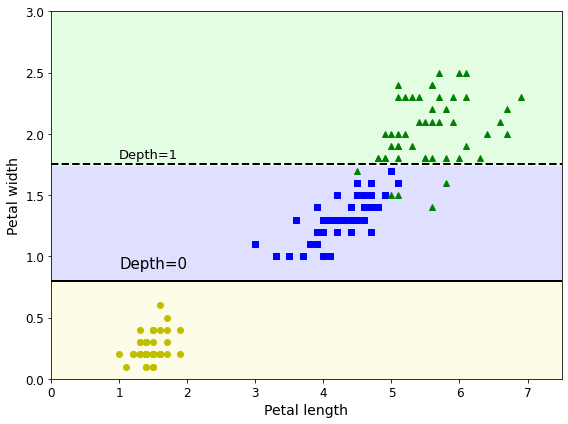

In [9]:
# Plot figure
plt.figure(figsize=(8, 6))

plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)

plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

## **Regularization Hyperparameters**

Saving figure min_samples_leaf_plot


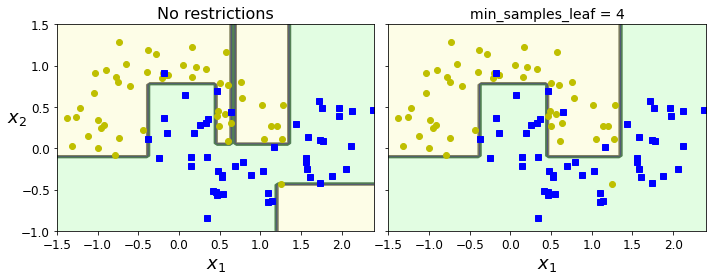

In [10]:
# data 
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)


# Models with different min_samples_leaf parameter
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

# Training the models
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

# Plot figure
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Axis 1
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, x_axis=[-1.5, 2.4], y_axis = [-1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)

# Axis 2
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, x_axis=[-1.5, 2.4], y_axis = [-1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

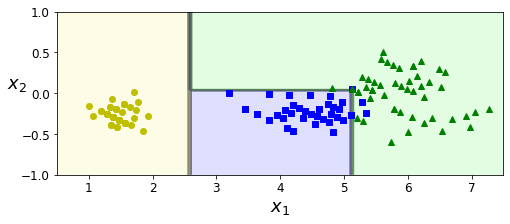

In [11]:
# Rotate the X matrix
angle           = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])

# Roate
Xr = X.dot(rotation_matrix)

# Model and training
tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, x_axis=[0.5, 7.5], y_axis=[-1.0, 1], iris=False)

plt.show()

Saving figure sensitivity_to_rotation_plot


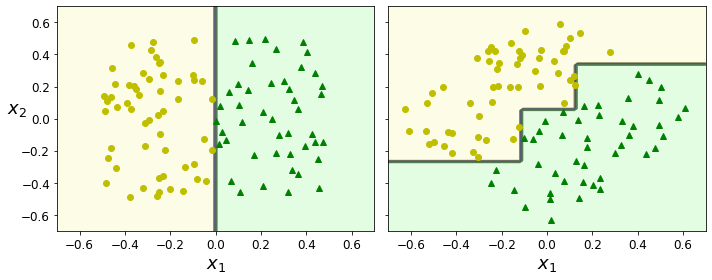

In [12]:
# Example of rotating data
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle           = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr             = Xs.dot(rotation_matrix)

# Models and training the models
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)

tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

# Plot figures
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Axis 1
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, x_axis=[-0.7, 0.7], y_axis=[-0.7, 0.7], iris=False)

# Axis 2
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, x_axis=[-0.7, 0.7], y_axis=[-0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

# Regression trees

In [13]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Model of Decision Tree with max_depth=2
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)

# Training
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

Saving figure tree_regression_plot


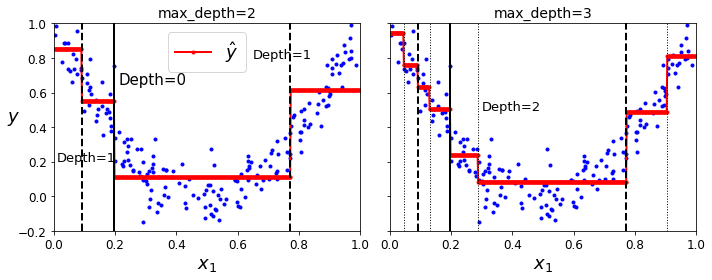

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Models of Decision Trees with max_depth=2, max_depth=3
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)

# Training
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, x_axis=[0, 1], y_axis=[-0.2, 1], ylabel="$y$"):
    # X-data and prediction y-pred
    x1     = np.linspace(x_axis[0], x_axis[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)

    plt.xlim(x_axis)
    plt.ylim(y_axis)
    plt.xlabel("$x_1$", fontsize=18)

    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)

    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

# Figure
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Axis 1
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

# Axis 2
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [22]:
export_graphviz(
        tree_reg1,
        out_file=os.path.join(FIG_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

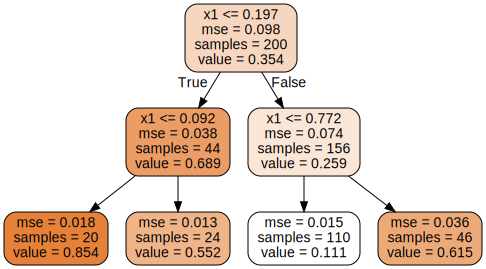

In [18]:
Source.from_file(os.path.join(FIG_PATH, "regression_tree.dot"))

Saving figure tree_regression_regularization_plot


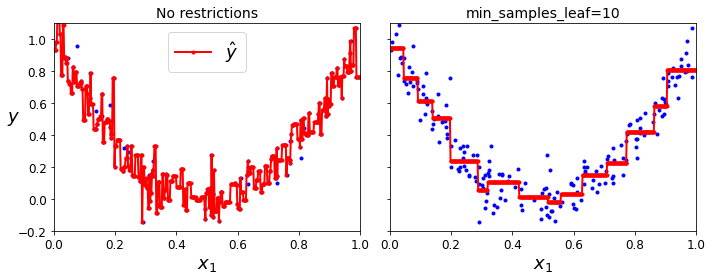

In [19]:
# Models of Decision Trees with min_samples_leaf and no restrictions
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)

# Training the two models
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# Prediction
x1      = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)


# Figures
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Axis 1
plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

# Axis 2
plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()